# Aufgabe 13.1

Ein Artikel in Biotechnology Progress (2001, Vol. 17, 14-90. pp. 366-368) berichtete über ein Experiment zur Untersuchung und Optimierung der Nisin-Extraktion in wässrigen Zweiphasensystemen (ATPS). Ein 22 vollfaktorielles Design wurde verwendet, um die wichtigsten Faktoren der Nisin-Wiederﬁndungzu veriﬁzieren. Der Faktor x1 war die Konzentration (% w/w) von PEG 4000 und x2 war die Konzentration (% w/w) von Na2SO4.

Die Nisin-Extraktion ist ein Verhältnis, das die Konzentration von Nisin darstellt, und dies war die Zielvariable y.  
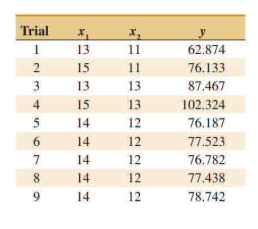

In einem neuen Bereich des Faktorenraums wurde ein central composite design (CCD) verwendet, um eine Optimierung zweiter Ordnung durchzuführen. Die Ergebnisse sind in der folgenden Tabelle dargestellt.  
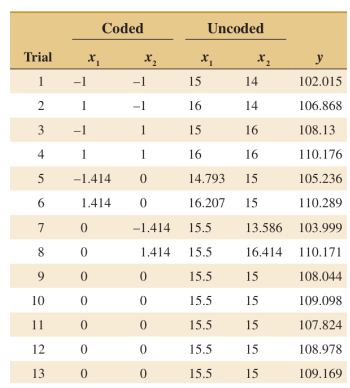


a) Passen Sie ein Modell zweiter Ordnung an diese Daten an.

In [7]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from patsy.contrasts import Treatment, Sum 
from statsmodels.stats.anova import anova_lm

df = pd.DataFrame({
    'x1': np.array([15,16,15,16,14.793,16.207,15.5,15.5,15.5,15.5,15.5,15.5,15.5]),
    'x2': np.array([14,14,16,16,15,15,13.586,16.414,15,15,15,15,15]), 
    'y':np.array([102.015,106.868,108.13,110.176,105.236,110.289,103.999,110.171,108.044,109.098,107.824,108.978,109.169]),
})

In [9]:
fit = ols('y~x1+x2+I(x1*x1)+I(x2*x2)+I(x1*x2)',data=df).fit()
fit.params

Intercept    -1078.342305
x1              97.327151
x2              51.792923
I(x1 * x1)      -2.347198
I(x2 * x2)      -0.925652
I(x1 * x2)      -1.403500
dtype: float64

Beta_dach_0  = -1078.342305  
Beta_dach_1  = 97.327151  
Beta_dach_2  = 51.792923  
Beta_dach_11 = -2.347198  
beta_dach_22 = -0.925652  
beta_dach_12 = -1.403500  
Y_dach = -1078.342305 + (97.327151 * x_1) + (51.792923 * x_2) + (-2.347198 * x_1^2) + (-0.925652 * x_2^2) + (-1.403500 * x_1 * x_2)

b) Erstellen Sie ein Höhenliniendiagramm und bestimmen Sie graphisch die optimale Einstellung.

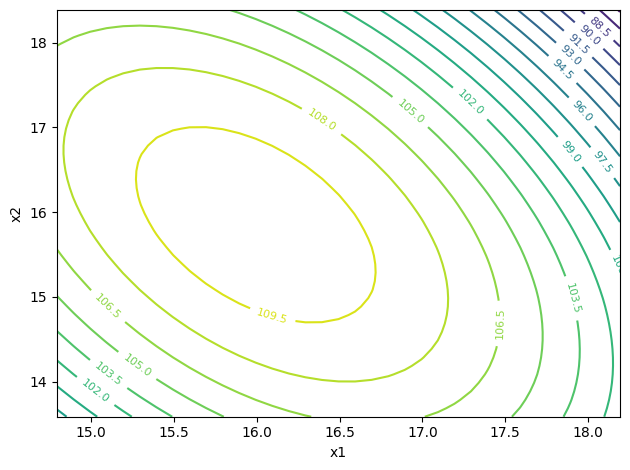

In [11]:
import matplotlib.pyplot as plt

b_0, b_1, b_2, b_11, b_22, b_12 = fit.params

X1 = np.arange(np.min(df['x1']), np.max(df['x1']+2), 0.1) 
X2 = np.arange(np.min(df['x2']), np.max(df['x2']+2), 0.1) 
X1, X2 = np.meshgrid(X1, X2)

Z = b_0 + b_1*X1 + b_2*X2 + b_11*X1**2 +b_22*X2**2+b_12*X1*X2 
AnzahlHoehen = 20

Bild = plt.contour(X1, X2, Z, AnzahlHoehen)
plt.clabel(Bild, inline=1, fontsize=8) # Beschriftung Hoehenlinien 
plt.xlabel('x1') # Beschriftung x-Achse
plt.ylabel('x2') # Beschriftung y-Achse
plt.tight_layout()

plt.show()

c) Bestimmen Sie das Optimum analytisch.

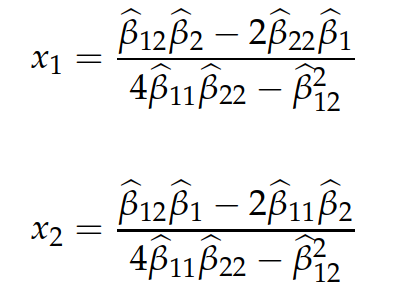

In [15]:
x_1 = (b_12*b_2-2*b_22*b_1) / (4*b_11*b_22-b_12**2) 
x_2 = (b_12*b_1-2*b_11*b_2) / (4*b_11*b_22-b_12**2)

print(f'x1={x_1:.3f}, x2={x_2:.3f}')

x1=15.993, x2=15.852
